In [1]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter

# El corpus fue obtenido de https://www.kaggle.com/rounakbanik/ted-talks
data = pd.read_csv("./ted-talks/ted_main.csv", error_bad_lines=False)  # Getting the data
transcripts = pd.read_csv("./ted-talks/transcripts.csv", error_bad_lines=False)

In [2]:
words = {}
tags_set = [eval(_) for _ in data['tags']]
for tags in tags_set:
    for tag in tags:
        tag = tag.lower()
        if tag in words.keys() and tag != "tedx":
            words[tag] += 1
        else:
            words[tag] = 1

tags, freq = zip(*Counter(words).most_common(10))

<BarContainer object of 10 artists>

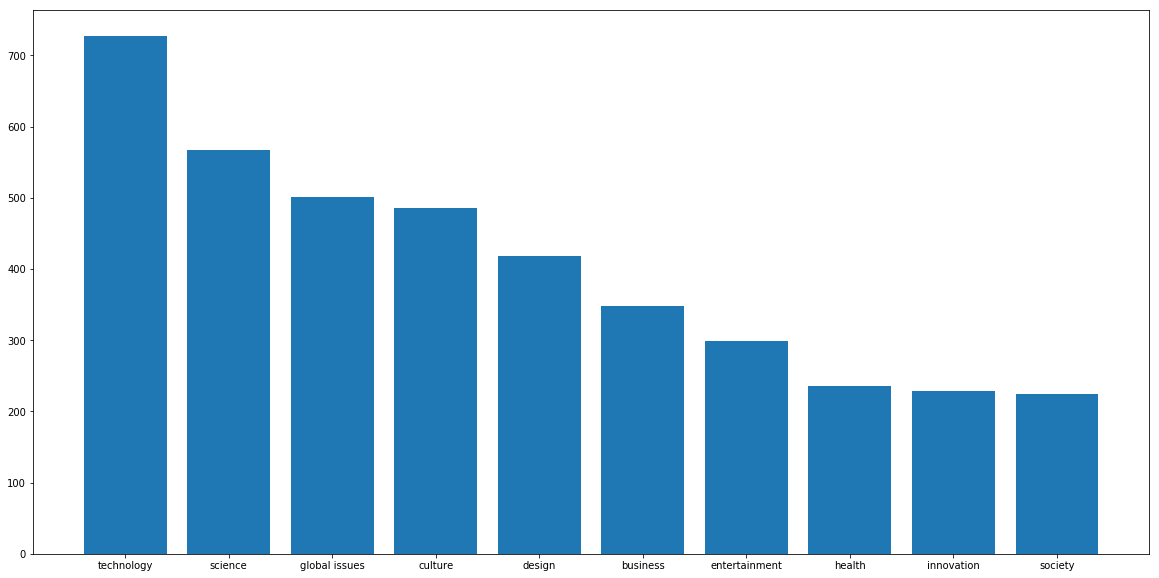

In [3]:
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
plt.bar(tags, freq)

In [4]:
data_desc = data['description']
#documentos = data_desc
documentos = transcripts['transcript']

## Visualizando parte de los datos

In [5]:
print(len(documentos))
print(documentos[:5])

2467
0    Good morning. How are you?(Laughter)It's been ...
1    Thank you so much, Chris. And it's truly a gre...
2    (Music: "The Sound of Silence," Simon & Garfun...
3    If you're here today — and I'm very happy that...
4    About 10 years ago, I took on the task to teac...
Name: transcript, dtype: object


In [7]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/umoqnier/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Funciones para preprocesamiento, lematización y stemming

In [8]:
def lematizacion_stemming(texto):
    stemmer = SnowballStemmer('english')
    return stemmer.stem(WordNetLemmatizer().lemmatize(texto, pos='v'))

def preprocesamiento(texto):
    return [lematizacion_stemming(token) for token in simple_preprocess(texto) 
            if token not in STOPWORDS and len(token) > 3]

In [9]:
ejemplo = documentos.iloc[1]
print("Documento original\n", " | ".join(ejemplo.split(' ')))
print("\n\nDocumento preprocesado\n", " | ".join(preprocesamiento(ejemplo)))

Documento original
 Thank | you | so | much, | Chris. | And | it's | truly | a | great | honor | to | have | the | opportunity | to | come | to | this | stage | twice; | I'm | extremely | grateful. | I | have | been | blown | away | by | this | conference, | and | I | want | to | thank | all | of | you | for | the | many | nice | comments | about | what | I | had | to | say | the | other | night. | And | I | say | that | sincerely, | partly | because | (Mock | sob) | I | need | that.(Laughter)Put | yourselves | in | my | position.(Laughter)I | flew | on | Air | Force | Two | for | eight | years.(Laughter)Now | I | have | to | take | off | my | shoes | or | boots | to | get | on | an | airplane!(Laughter)(Applause)I'll | tell | you | one | quick | story | to | illustrate | what | that's | been | like | for | me.(Laughter)It's | a | true | story | — | every | bit | of | this | is | true.Soon | after | Tipper | and | I | left | the | — | (Mock | sob) | White | House | —(Laughter)we | were



Documento preprocesado
 thank | chris | truli | great | honor | opportun | come | stage | twice | extrem | grate | blow | away | confer | want | thank | nice | comment | night | sincer | part | mock | need | laughter | posit | laughter | fli | forc | year | laughter | shoe | boot | airplan | laughter | applaus | tell | quick | stori | illustr | like | laughter | true | stori | true | soon | tipper | leav | mock | white | hous | laughter | drive | home | nashvill | littl | farm | mile | east | nashvill | drive | laughter | know | sound | like | littl | thing | laughter | look | rear | view | mirror | sudden | motorcad | laughter | hear | phantom | limb | pain | laughter | rent | ford | taurus | laughter | dinnertim | start | look | place | exit | lebanon | tennesse | exit | shoney | restaur | cost | famili | restaur | chain | know | go | booth | waitress | come | commot | tipper | laughter | take | order | go | coupl | booth | lower | voic | strain | hear | say | say | vice | presid |

In [10]:
documentos_preprocesados = documentos.map(preprocesamiento)
documentos_preprocesados[:10]

0    [good, morn, laughter, great, hasn, blow, away...
1    [thank, chris, truli, great, honor, opportun, ...
2    [music, sound, silenc, simon, garfunkel, hello...
3    [today, happi, hear, sustain, develop, save, t...
4    [year, take, task, teach, global, develop, swe...
5    [thank, tell, challeng, excit, excit, chanc, c...
6    [septemb, morn, seventh, birthday, come, downs...
7    [go, present, project, rapid, time, want, rein...
8    [wonder, love, wonder, gather, wonder, earth, ...
9    [ask, surpris, book, write, imagin, wildest, d...
Name: transcript, dtype: object

# Bolsa de palabras

In [11]:
diccionario = gensim.corpora.Dictionary(documentos_preprocesados)

j = 0
for key, value in diccionario.iteritems():
    print(key, value)
    j += 1
    if j >= 10:
        break

0 abil
1 abstract
2 academ
3 accord
4 achiev
5 actual
6 adhd
7 adopt
8 adult
9 advic


## Filtrando los tokens

In [12]:
diccionario.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

Por cada documento se crea un diccionario las palabras del corpus y cuantas veces apararecen

In [13]:
bow_corpus = [diccionario.doc2bow(doc) for doc in documentos_preprocesados]
bow_corpus[1]

[(7, 1),
 (15, 2),
 (28, 1),
 (30, 1),
 (34, 2),
 (39, 1),
 (40, 2),
 (55, 1),
 (65, 2),
 (73, 1),
 (76, 3),
 (82, 2),
 (89, 2),
 (90, 1),
 (94, 2),
 (95, 2),
 (108, 1),
 (113, 1),
 (115, 3),
 (121, 1),
 (123, 1),
 (131, 1),
 (138, 1),
 (153, 3),
 (157, 1),
 (161, 1),
 (163, 1),
 (166, 2),
 (174, 3),
 (181, 2),
 (186, 1),
 (197, 1),
 (201, 1),
 (203, 1),
 (207, 1),
 (215, 1),
 (220, 1),
 (225, 1),
 (227, 1),
 (228, 1),
 (239, 5),
 (244, 2),
 (251, 1),
 (254, 1),
 (259, 1),
 (265, 1),
 (272, 1),
 (273, 2),
 (278, 1),
 (280, 1),
 (286, 1),
 (287, 1),
 (292, 1),
 (294, 1),
 (299, 1),
 (312, 2),
 (318, 1),
 (321, 1),
 (322, 1),
 (328, 1),
 (333, 2),
 (334, 1),
 (337, 1),
 (342, 7),
 (351, 1),
 (352, 1),
 (358, 1),
 (360, 2),
 (361, 2),
 (368, 1),
 (374, 4),
 (379, 1),
 (385, 1),
 (396, 1),
 (398, 2),
 (409, 1),
 (410, 2),
 (412, 1),
 (413, 1),
 (414, 1),
 (415, 2),
 (416, 1),
 (417, 1),
 (418, 1),
 (419, 1),
 (420, 1),
 (421, 1),
 (422, 1),
 (423, 1),
 (424, 1),
 (425, 1),
 (426, 1),
 (427

### Reporte simple

In [14]:
for i in range(len(bow_corpus[1])):
    print("La palabra #{} ('{}') aparece {} veces".format(bow_corpus[1][i][0],
                                                         diccionario[bow_corpus[1][i][0]],
                                                         bow_corpus[1][i][1]))

La palabra #7 ('advic') aparece 1 veces
La palabra #15 ('america') aparece 2 veces
La palabra #28 ('away') aparece 1 veces
La palabra #30 ('base') aparece 1 veces
La palabra #34 ('begin') aparece 2 veces
La palabra #39 ('blow') aparece 1 veces
La palabra #40 ('board') aparece 2 veces
La palabra #55 ('celebr') aparece 1 veces
La palabra #65 ('combin') aparece 2 veces
La palabra #73 ('confer') aparece 1 veces
La palabra #76 ('consid') aparece 3 veces
La palabra #82 ('countri') aparece 2 veces
La palabra #89 ('day') aparece 2 veces
La palabra #90 ('deal') aparece 1 veces
La palabra #94 ('degre') aparece 2 veces
La palabra #95 ('design') aparece 2 veces
La palabra #108 ('door') aparece 1 veces
La palabra #113 ('ecolog') aparece 1 veces
La palabra #115 ('effect') aparece 3 veces
La palabra #121 ('epiphani') aparece 1 veces
La palabra #123 ('everybodi') aparece 1 veces
La palabra #131 ('face') aparece 1 veces
La palabra #138 ('focus') aparece 1 veces
La palabra #153 ('gore') aparece 3 veces


## TF-IDF

In [15]:
from gensim import corpora, models
from pprint import pprint

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.030841518848622018),
 (1, 0.0301734917362269),
 (2, 0.12198226549448672),
 (3, 0.024128190992013774),
 (4, 0.018201288284301398),
 (5, 0.02784439549855875),
 (6, 0.022212878126299747),
 (7, 0.030743959746451412),
 (8, 0.018349838466187336),
 (9, 0.022285914324979693),
 (10, 0.046165179684840955),
 (11, 0.03117184746414727),
 (12, 0.019822644532795912),
 (13, 0.0318026657089172),
 (14, 0.009920437095568781),
 (15, 0.015919640040550503),
 (16, 0.043808069664331824),
 (17, 0.0873599541554942),
 (18, 0.04028206729819656),
 (19, 0.07468102220974873),
 (20, 0.03488706493031767),
 (21, 0.06475236374140868),
 (22, 0.06442780983977359),
 (23, 0.015413633900130836),
 (24, 0.01733004601337859),
 (25, 0.04267078483797368),
 (26, 0.018399838684848145),
 (27, 0.02014448874970323),
 (28, 0.014874757409096453),
 (29, 0.2412960376953551),
 (30, 0.011985674629705904),
 (31, 0.02130803424713791),
 (32, 0.055378259883510764),
 (33, 0.02250820621751248),
 (34, 0.007301043026854923),
 (35, 0.01530822

# Usando LDA con Bag of Words

In [16]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=diccionario, passes=2, workers=2)
print("* LDA - BoW *\n\n")
for t_id, topico in lda_model.print_topics(-1):
    print("Topico #{}\nPalabras: {}\n\n".format(t_id, topico))

* LDA - BoW *


Topico #0
Palabras: 0.005*"design" + 0.003*"water" + 0.003*"percent" + 0.003*"fish" + 0.003*"grow" + 0.003*"countri" + 0.003*"natur" + 0.003*"form" + 0.003*"million" + 0.002*"reason"


Topico #1
Palabras: 0.006*"feel" + 0.005*"women" + 0.004*"stori" + 0.004*"experi" + 0.003*"word" + 0.003*"percent" + 0.003*"write" + 0.003*"natur" + 0.003*"show" + 0.003*"face"


Topico #2
Palabras: 0.006*"countri" + 0.005*"citi" + 0.004*"state" + 0.004*"power" + 0.004*"stori" + 0.003*"believ" + 0.003*"love" + 0.003*"feel" + 0.003*"cours" + 0.003*"home"


Topico #3
Palabras: 0.004*"robot" + 0.003*"countri" + 0.003*"health" + 0.003*"diseas" + 0.003*"school" + 0.003*"govern" + 0.003*"percent" + 0.003*"technolog" + 0.003*"hand" + 0.003*"million"


Topico #4
Palabras: 0.004*"stori" + 0.004*"citi" + 0.004*"brain" + 0.004*"love" + 0.003*"countri" + 0.003*"percent" + 0.003*"sort" + 0.003*"planet" + 0.003*"interest" + 0.003*"data"


Topico #5
Palabras: 0.006*"stori" + 0.003*"countri" + 0.003*"sch

## Usando LDA con TFIDF

In [17]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=diccionario, passes=2, workers=4)
print("* LAD - TFIDF *\n\n")
for t_id, topico in lda_model_tfidf.print_topics(-1):
    print("Topico #{}\nPalabras: {}\n\n".format(t_id, topico))

* LAD - TFIDF *


Topico #0
Palabras: 0.002*"data" + 0.002*"music" + 0.002*"brain" + 0.001*"kid" + 0.001*"energi" + 0.001*"water" + 0.001*"africa" + 0.001*"planet" + 0.001*"technolog" + 0.001*"product"


Topico #1
Palabras: 0.003*"women" + 0.002*"girl" + 0.001*"cancer" + 0.001*"mother" + 0.001*"voic" + 0.001*"babi" + 0.001*"children" + 0.001*"water" + 0.001*"diseas" + 0.001*"health"


Topico #2
Palabras: 0.003*"music" + 0.002*"citi" + 0.001*"brain" + 0.001*"design" + 0.001*"sound" + 0.001*"energi" + 0.001*"photograph" + 0.001*"paint" + 0.001*"video" + 0.001*"play"


Topico #3
Palabras: 0.001*"design" + 0.001*"data" + 0.001*"robot" + 0.001*"countri" + 0.001*"citi" + 0.001*"univers" + 0.001*"govern" + 0.001*"percent" + 0.001*"water" + 0.001*"communiti"


Topico #4
Palabras: 0.002*"women" + 0.002*"robot" + 0.002*"brain" + 0.001*"design" + 0.001*"machin" + 0.001*"technolog" + 0.001*"data" + 0.001*"countri" + 0.001*"compani" + 0.001*"children"


Topico #5
Palabras: 0.003*"music" + 0.002*"pl

## Evaluación usando BoW

In [18]:
print(" ".join(documentos_preprocesados[1][:20]) + "...")
for i, puntuacion in sorted(lda_model[bow_corpus[1]], key=lambda tup: -1 * tup[1]):
    print("\nPuntuación {}\nTopico: {}".format(puntuacion, lda_model.print_topic(i, 10)))

thank chris truli great honor opportun come stage twice extrem grate blow away confer want thank nice comment night sincer...

Puntuación 0.4138835668563843
Topico: 0.006*"design" + 0.005*"data" + 0.004*"percent" + 0.004*"inform" + 0.003*"technolog" + 0.003*"play" + 0.003*"water" + 0.003*"exampl" + 0.003*"develop" + 0.003*"state"

Puntuación 0.2536822259426117
Topico: 0.005*"design" + 0.003*"water" + 0.003*"percent" + 0.003*"fish" + 0.003*"grow" + 0.003*"countri" + 0.003*"natur" + 0.003*"form" + 0.003*"million" + 0.002*"reason"

Puntuación 0.16461001336574554
Topico: 0.006*"countri" + 0.005*"citi" + 0.004*"state" + 0.004*"power" + 0.004*"stori" + 0.003*"believ" + 0.003*"love" + 0.003*"feel" + 0.003*"cours" + 0.003*"home"

Puntuación 0.07720452547073364
Topico: 0.005*"women" + 0.004*"brain" + 0.004*"percent" + 0.003*"countri" + 0.003*"technolog" + 0.003*"exampl" + 0.003*"number" + 0.003*"power" + 0.003*"state" + 0.003*"develop"

Puntuación 0.0631348192691803
Topico: 0.006*"stori" + 0.00

## Evaluación usando TFIDF

In [19]:
for index, score in sorted(lda_model_tfidf[bow_corpus[1]], key=lambda tup: -1*tup[1]):
    print("\nPuntuación: {}\nTopico: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Puntuación: 0.3633022904396057
Topico: 0.001*"design" + 0.001*"data" + 0.001*"robot" + 0.001*"countri" + 0.001*"citi" + 0.001*"univers" + 0.001*"govern" + 0.001*"percent" + 0.001*"water" + 0.001*"communiti"

Puntuación: 0.26817241311073303
Topico: 0.002*"women" + 0.002*"robot" + 0.002*"brain" + 0.001*"design" + 0.001*"machin" + 0.001*"technolog" + 0.001*"data" + 0.001*"countri" + 0.001*"compani" + 0.001*"children"

Puntuación: 0.21755772829055786
Topico: 0.002*"women" + 0.002*"ocean" + 0.001*"citi" + 0.001*"water" + 0.001*"forest" + 0.001*"brain" + 0.001*"cell" + 0.001*"stori" + 0.001*"planet" + 0.001*"tree"

Puntuación: 0.14987879991531372
Topico: 0.002*"data" + 0.002*"music" + 0.002*"brain" + 0.001*"kid" + 0.001*"energi" + 0.001*"water" + 0.001*"africa" + 0.001*"planet" + 0.001*"technolog" + 0.001*"product"


## Pruebas con documentos no vistos

In [20]:
with open("./ted-talks/katie-transcript-2019.txt", 'r') as f:
    documento_nuevo = f.read()
bow_vector = diccionario.doc2bow(preprocesamiento(documento_nuevo))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Puntuacion: {}\n Topico: {}\n".format(score, lda_model.print_topic(index, 10)))

Puntuacion: 0.4241516590118408
 Topico: 0.005*"women" + 0.004*"brain" + 0.004*"percent" + 0.003*"countri" + 0.003*"technolog" + 0.003*"exampl" + 0.003*"number" + 0.003*"power" + 0.003*"state" + 0.003*"develop"

Puntuacion: 0.35328570008277893
 Topico: 0.006*"feel" + 0.005*"women" + 0.004*"stori" + 0.004*"experi" + 0.003*"word" + 0.003*"percent" + 0.003*"write" + 0.003*"natur" + 0.003*"show" + 0.003*"face"

Puntuacion: 0.12603016197681427
 Topico: 0.006*"stori" + 0.003*"countri" + 0.003*"school" + 0.003*"hear" + 0.003*"feel" + 0.003*"love" + 0.003*"write" + 0.003*"citi" + 0.003*"word" + 0.003*"bodi"

Puntuacion: 0.07719036936759949
 Topico: 0.006*"cell" + 0.005*"music" + 0.005*"love" + 0.004*"univers" + 0.004*"play" + 0.004*"number" + 0.003*"power" + 0.003*"bodi" + 0.003*"interest" + 0.003*"school"

Puntuacion: 0.010481089353561401
 Topico: 0.004*"stori" + 0.004*"citi" + 0.004*"brain" + 0.004*"love" + 0.003*"countri" + 0.003*"percent" + 0.003*"sort" + 0.003*"planet" + 0.003*"interest" +

Notas basadas fuertemente en este [articulo](https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24)